In [62]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import random
from mecab import MeCab
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model
import urllib.request
from tokenizers import BertWordPieceTokenizer
import tensorflow as tf

In [63]:
raw = pd.read_csv("C:/Users/User/Downloads/도서자료 요약/Training/merged_data.csv")
df = raw.copy()

In [64]:
list_index = df[df.summary.duplicated()].index

In [65]:
# 중복된 값 삭제
for index in list_index:
    df = df.drop(index)

In [66]:
df.isnull().sum()

passage    0
summary    0
dtype: int64

In [67]:
# 형태소 분석기 초기화
mecab = MeCab()

In [68]:
df

,passage,summary
0,지금의 국가가 직면하는 위기는 전통사회의 그것과 위기의 규모뿐만아니라 종류와 성질 ...,현대 사회에서 발생하는 다양하고 복잡한 위기는 과거와 다르게 국가의 재난으로 이어질...
1,자연재해나 불량 수산식품 파동 등의 인위적 재난이 수산분야 피해로이어질 경우 일반분...,"수산분야의 인위적 재난 시수산물 수급 문제로 생산자들의 매출이 크게 줄고, 시장 전..."
2,하지만 이와 반대로 MG 파동 이후 기간(2005.10～2011.12)의 경우에는 ...,MG 파동 이후에는 양식 송어의 생산량의 증가가 통계적 유의성을 갖는 것으로 드러났...
3,그러나 사회적 이슈가 발생하였을 경우에 전문적으로 이러한 정보를 수집하고 분석하는 ...,사회적 이슈 발생 시 전문적으로 정보 수집 및 분석을 하는 관측 시스템이 아직 구축...
4,네 번째는 공급감소로 국내 물량이 부족하게 되면 유통질서가 왜곡될 가능성이 많기 때...,일부 경우에서의 유통질서 혼란을 방지하기 위해 거래형태의 변형이 필요하다. 의도적 ...
...,...,...
159997,지도자로 등장한 2012년부터 2016년까지는 최고지도자로 추대되기 위한 준비기간이...,2012년 김정은은 국가 운영과 관련해 퍼포먼스를 선보였다. LED 패널을 이용한 ...
159998,그러나 공공도서관은 과거 도서출판의 급속한 성장에 따른 장서수의 확충과 미디어의 확...,양적 성장을 추구했던 공공도서관은 이젠 질적 향상에도 집중해야 할 때이다. 정보통신...
159999,"작은도서관의 이용자가 이동에 제약이 있는 유아, 노인들처럼 도보만을 이용할 수 있는...",작은도서관 이용자가 도보이동반경 내에 다수의 도서관이 없는 한 대체재의 역할을 수행...
160000,"공공도서관 사서는 정보가 축적된 모든 형태의 매체자료(인쇄자료, 필사자료, 시청각자...","공공도서관 사서는 정보자료를 국민에게 제공하며 정보자료의 유통, 정보 접근 및 이용..."


In [69]:
def preprocess_text(text):
    token = mecab.morphs(text)
    return ' '.join(token)

In [70]:
df['PreprocessedText'] = df['passage'].apply(preprocess_text)

In [71]:
df['Pred_summary'] = df['summary'].apply(preprocess_text)

In [72]:
df

,passage,summary,PreprocessedText,Pred_summary
0,지금의 국가가 직면하는 위기는 전통사회의 그것과 위기의 규모뿐만아니라 종류와 성질 ...,현대 사회에서 발생하는 다양하고 복잡한 위기는 과거와 다르게 국가의 재난으로 이어질...,지금 의 국가 가 직면 하 는 위기 는 전통 사회 의 그것 과 위기 의 규모 뿐 만...,현대 사회 에서 발생 하 는 다양 하 고 복잡 한 위기 는 과거 와 다르 게 국가 ...
1,자연재해나 불량 수산식품 파동 등의 인위적 재난이 수산분야 피해로이어질 경우 일반분...,"수산분야의 인위적 재난 시수산물 수급 문제로 생산자들의 매출이 크게 줄고, 시장 전...",자연재해 나 불량 수산 식품 파동 등 의 인위 적 재난 이 수산 분야 피해 로 이어...,수산 분야 의 인위 적 재난 시수 산물 수급 문제 로 생산자 들 의 매출 이 크 게...
2,하지만 이와 반대로 MG 파동 이후 기간(2005.10～2011.12)의 경우에는 ...,MG 파동 이후에는 양식 송어의 생산량의 증가가 통계적 유의성을 갖는 것으로 드러났...,하지만 이 와 반 대로 MG 파동 이후 기간 ( 2005 . 10 ～ 2011 . ...,MG 파동 이후 에 는 양식 송어 의 생산량 의 증가 가 통계 적 유의 성 을 갖 ...
3,그러나 사회적 이슈가 발생하였을 경우에 전문적으로 이러한 정보를 수집하고 분석하는 ...,사회적 이슈 발생 시 전문적으로 정보 수집 및 분석을 하는 관측 시스템이 아직 구축...,그러나 사회 적 이슈 가 발생 하 였을 경우 에 전문 적 으로 이러 한 정보 를 수...,사회 적 이슈 발생 시 전문 적 으로 정보 수집 및 분석 을 하 는 관측 시스템 이...
4,네 번째는 공급감소로 국내 물량이 부족하게 되면 유통질서가 왜곡될 가능성이 많기 때...,일부 경우에서의 유통질서 혼란을 방지하기 위해 거래형태의 변형이 필요하다. 의도적 ...,네 번 째 는 공급 감소 로 국내 물량 이 부족 하 게 되 면 유통 질서 가 왜곡 ...,일부 경우 에서 의 유통 질서 혼란 을 방지 하 기 위해 거래 형태 의 변형 이 필...
...,...,...,...,...
159997,지도자로 등장한 2012년부터 2016년까지는 최고지도자로 추대되기 위한 준비기간이...,2012년 김정은은 국가 운영과 관련해 퍼포먼스를 선보였다. LED 패널을 이용한 ...,지도자 로 등장 한 2012 년 부터 2016 년 까지 는 최고 지도자 로 추대 되...,2012 년 김정은 은 국가 운영 과 관련 해 퍼포먼스 를 선보였 다 . LED 패...
159998,그러나 공공도서관은 과거 도서출판의 급속한 성장에 따른 장서수의 확충과 미디어의 확...,양적 성장을 추구했던 공공도서관은 이젠 질적 향상에도 집중해야 할 때이다. 정보통신...,그러나 공공 도서관 은 과거 도서 출판 의 급속 한 성장 에 따른 장 서수 의 확충...,양 적 성장 을 추구 했 던 공공 도서관 은 이젠 질 적 향상 에 도 집중 해야 할...
159999,"작은도서관의 이용자가 이동에 제약이 있는 유아, 노인들처럼 도보만을 이용할 수 있는...",작은도서관 이용자가 도보이동반경 내에 다수의 도서관이 없는 한 대체재의 역할을 수행...,"작 은 도서관 의 이용자 가 이동 에 제약 이 있 는 유아 , 노인 들 처럼 도보 ...",작 은 도서관 이용자 가 도보이 동반 경 내 에 다수 의 도서관 이 없 는 한 대체...
160000,"공공도서관 사서는 정보가 축적된 모든 형태의 매체자료(인쇄자료, 필사자료, 시청각자...","공공도서관 사서는 정보자료를 국민에게 제공하며 정보자료의 유통, 정보 접근 및 이용...","공공 도서관 사서 는 정보 가 축적 된 모든 형태 의 매체 자료 ( 인쇄 자료 , ...","공공 도서관 사서 는 정보 자료 를 국민 에게 제공 하 며 정보 자료 의 유통 , ..."


In [73]:
def preprocess_sentence(sentence, remove_stopwords=True):
    sentence = sentence.lower()  # 텍스트 소문자화
    sentence = re.sub(r"/([^)]*/)", "", sentence)  # 괄호로 닫힌 문자열 제거 Ex) 가나다 (abc) -> 가나다
    sentence = re.sub('"', "", sentence)  # 쌍따옴표 " 제거
    sentence = re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣]", " ", sentence)  # 한글과 영어, 숫자를 제외한 문자 공백으로 변환
    sentence = re.sub(" +", " ", sentence)

    return sentence

In [74]:
df['PreprocessedText'] = df['PreprocessedText'].apply(preprocess_sentence)

In [75]:
df['Pred_summary'] = df['Pred_summary'].apply(preprocess_sentence)

In [76]:
df.rename(columns={'PreprocessedText': 'Pred_Text'}, inplace=True)


In [77]:
df.replace('', np.nan, inplace=True)
print(df.isnull().sum())

passage         0
summary         0
Pred_Text       0
Pred_summary    0
dtype: int64


In [78]:
df

,passage,summary,Pred_Text,Pred_summary
0,지금의 국가가 직면하는 위기는 전통사회의 그것과 위기의 규모뿐만아니라 종류와 성질 ...,현대 사회에서 발생하는 다양하고 복잡한 위기는 과거와 다르게 국가의 재난으로 이어질...,지금 의 국가 가 직면 하 는 위기 는 전통 사회 의 그것 과 위기 의 규모 뿐 만...,현대 사회 에서 발생 하 는 다양 하 고 복잡 한 위기 는 과거 와 다르 게 국가 ...
1,자연재해나 불량 수산식품 파동 등의 인위적 재난이 수산분야 피해로이어질 경우 일반분...,"수산분야의 인위적 재난 시수산물 수급 문제로 생산자들의 매출이 크게 줄고, 시장 전...",자연재해 나 불량 수산 식품 파동 등 의 인위 적 재난 이 수산 분야 피해 로 이어...,수산 분야 의 인위 적 재난 시수 산물 수급 문제 로 생산자 들 의 매출 이 크 게...
2,하지만 이와 반대로 MG 파동 이후 기간(2005.10～2011.12)의 경우에는 ...,MG 파동 이후에는 양식 송어의 생산량의 증가가 통계적 유의성을 갖는 것으로 드러났...,하지만 이 와 반 대로 파동 이후 기간 의 경우 에 는 모형 의 적합 도 나 시간 ...,파동 이후 에 는 양식 송어 의 생산량 의 증가 가 통계 적 유의 성 을 갖 는 ...
3,그러나 사회적 이슈가 발생하였을 경우에 전문적으로 이러한 정보를 수집하고 분석하는 ...,사회적 이슈 발생 시 전문적으로 정보 수집 및 분석을 하는 관측 시스템이 아직 구축...,그러나 사회 적 이슈 가 발생 하 였을 경우 에 전문 적 으로 이러 한 정보 를 수...,사회 적 이슈 발생 시 전문 적 으로 정보 수집 및 분석 을 하 는 관측 시스템 이...
4,네 번째는 공급감소로 국내 물량이 부족하게 되면 유통질서가 왜곡될 가능성이 많기 때...,일부 경우에서의 유통질서 혼란을 방지하기 위해 거래형태의 변형이 필요하다. 의도적 ...,네 번 째 는 공급 감소 로 국내 물량 이 부족 하 게 되 면 유통 질서 가 왜곡 ...,일부 경우 에서 의 유통 질서 혼란 을 방지 하 기 위해 거래 형태 의 변형 이 필...
...,...,...,...,...
159997,지도자로 등장한 2012년부터 2016년까지는 최고지도자로 추대되기 위한 준비기간이...,2012년 김정은은 국가 운영과 관련해 퍼포먼스를 선보였다. LED 패널을 이용한 ...,지도자 로 등장 한 년 부터 년 까지 는 최고 지도자 로 추대 되 기 위한 준비 기...,년 김정은 은 국가 운영 과 관련 해 퍼포먼스 를 선보였 다 패널 을 이용 한 배...
159998,그러나 공공도서관은 과거 도서출판의 급속한 성장에 따른 장서수의 확충과 미디어의 확...,양적 성장을 추구했던 공공도서관은 이젠 질적 향상에도 집중해야 할 때이다. 정보통신...,그러나 공공 도서관 은 과거 도서 출판 의 급속 한 성장 에 따른 장 서수 의 확충...,양 적 성장 을 추구 했 던 공공 도서관 은 이젠 질 적 향상 에 도 집중 해야 할...
159999,"작은도서관의 이용자가 이동에 제약이 있는 유아, 노인들처럼 도보만을 이용할 수 있는...",작은도서관 이용자가 도보이동반경 내에 다수의 도서관이 없는 한 대체재의 역할을 수행...,작 은 도서관 의 이용자 가 이동 에 제약 이 있 는 유아 노인 들 처럼 도보 만 ...,작 은 도서관 이용자 가 도보이 동반 경 내 에 다수 의 도서관 이 없 는 한 대체...
160000,"공공도서관 사서는 정보가 축적된 모든 형태의 매체자료(인쇄자료, 필사자료, 시청각자...","공공도서관 사서는 정보자료를 국민에게 제공하며 정보자료의 유통, 정보 접근 및 이용...",공공 도서관 사서 는 정보 가 축적 된 모든 형태 의 매체 자료 인쇄 자료 필사 자...,공공 도서관 사서 는 정보 자료 를 국민 에게 제공 하 며 정보 자료 의 유통 정보...


In [79]:
df.dropna(axis = 0, inplace = True)
print('전체 샘플수 :',(len(df)))

전체 샘플수 : 158469


텍스트의 최소 길이 : 0
텍스트의 최대 길이 : 512
텍스트의 평균 길이 : 197.1602079902063
요약의 최소 길이 : 0
요약의 최대 길이 : 165
요약의 평균 길이 : 54.11590910525087


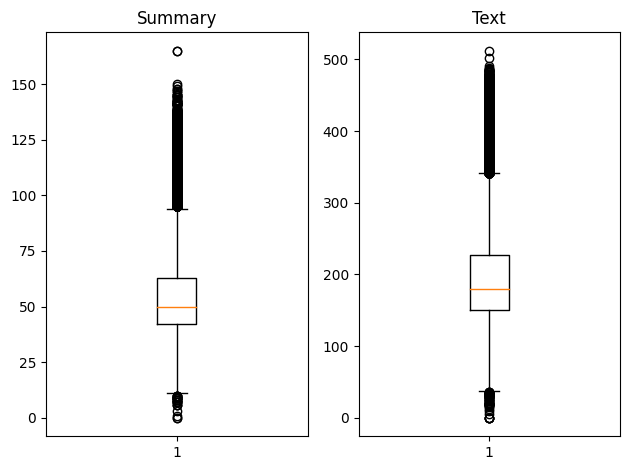

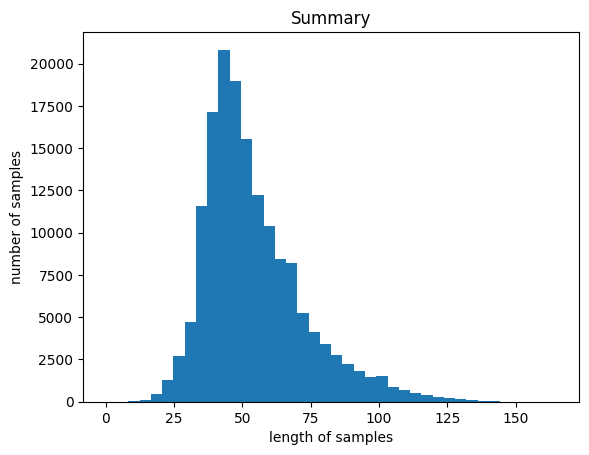

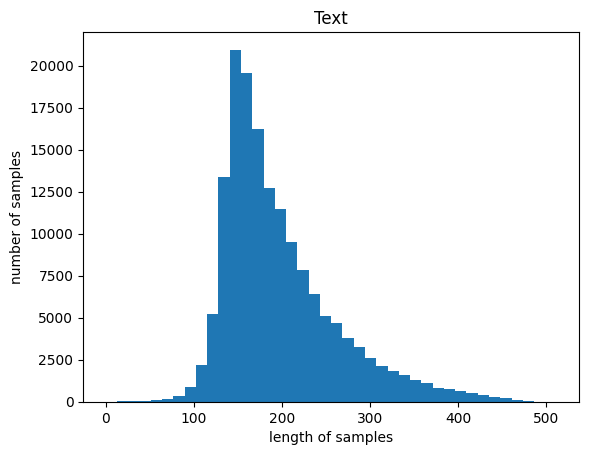

In [80]:
text_len = [len(s.split()) for s in df['Pred_Text']]
summary_len = [len(s.split()) for s in df['Pred_summary']]

print('텍스트의 최소 길이 : {}'.format(np.min(text_len)))
print('텍스트의 최대 길이 : {}'.format(np.max(text_len)))
print('텍스트의 평균 길이 : {}'.format(np.mean(text_len)))
print('요약의 최소 길이 : {}'.format(np.min(summary_len)))
print('요약의 최대 길이 : {}'.format(np.max(summary_len)))
print('요약의 평균 길이 : {}'.format(np.mean(summary_len)))

plt.subplot(1,2,1)
plt.boxplot(summary_len)
plt.title('Summary')
plt.subplot(1,2,2)
plt.boxplot(text_len)
plt.title('Text')
plt.tight_layout()
plt.show()

plt.title('Summary')
plt.hist(summary_len, bins=40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('Text')
plt.hist(text_len, bins=40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [81]:
text_max_len = 256
summary_max_len = 100

In [82]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s.split()) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))))

In [83]:
below_threshold_len(text_max_len, df['Pred_Text'])


전체 샘플 중 길이가 256 이하인 샘플의 비율: 0.8374319267490803


In [84]:
below_threshold_len(summary_max_len, df['Pred_summary'])


전체 샘플 중 길이가 100 이하인 샘플의 비율: 0.9734332897916943


In [85]:
df = df[df['Pred_Text'].apply(lambda x: len(x.split()) <= text_max_len)]
df = df[df['Pred_summary'].apply(lambda x: len(x.split()) <= summary_max_len)]
print('전체 샘플수 :',(len(df)))

전체 샘플수 : 132609


In [86]:
df['Pred_Text'] = df['Pred_Text'].apply(lambda x : 'sostoken '+ x +' eostoken')
df['Pred_summary'] = df['Pred_summary'].apply(lambda x : 'sostoken '+ x +' eostoken')



In [87]:
src_tokenizer = Tokenizer()
src_tokenizer.fit_on_texts(df['Pred_Text'])

In [88]:
threshold = 7
total_cnt = len(src_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in src_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)


단어 집합(vocabulary)의 크기 : 92920
등장 빈도가 6번 이하인 희귀 단어의 수: 60341
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 32579
단어 집합에서 희귀 단어의 비율: 64.93865690916918
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 0.5603931664817531


In [89]:
src_vocab = 32000
src_tokenizer = Tokenizer(num_words = src_vocab) 
src_tokenizer.fit_on_texts(df['Pred_Text'])
encoder_input_train = src_tokenizer.texts_to_sequences(df['Pred_Text']) 


In [90]:
df['Pred_summary'][0]

'sostoken 현대 사회 에서 발생 하 는 다양 하 고 복잡 한 위기 는 과거 와 다르 게 국가 의 재난 으로 이어질 수 있 으므로 국가 의 신속 한 대책 능력 이 필요 하 다  eostoken'

In [91]:
print(encoder_input_train[0])


[24, 737, 1, 62, 15, 1628, 3, 2, 606, 2, 646, 48, 1, 713, 18, 606, 1, 222, 230, 52, 101, 107, 1373, 27, 2938, 54, 16, 10411, 862, 112, 23, 21, 8, 7, 198, 1207, 48, 16, 2, 303, 118, 3, 12, 1553, 3, 34, 606, 15, 156, 23, 230, 52, 101, 107, 35, 1037, 6455, 45, 6, 305, 920, 4099, 558, 4599, 10, 835, 26, 48, 10, 926, 22, 592, 606, 6, 821, 29, 104, 1172, 14, 1255, 5, 431, 12, 8, 7, 169, 606, 1, 135, 11, 14, 73, 230, 52, 101, 107, 62, 1, 835, 13, 1511, 2, 43, 15, 133, 7, 169, 62, 2, 72, 14, 606, 165, 4, 156, 3, 1963, 43, 6, 49, 5390, 9, 3649, 421, 3, 12, 375, 3, 35, 47, 1100, 254, 17, 143, 297, 1, 1237, 18, 566, 5, 248, 3, 2, 19, 4, 978, 62, 1, 162, 289, 10, 26, 445, 4, 29, 87, 4, 7, 25]


In [92]:
src_tokenizer.fit_on_texts(df['Pred_summary'])
decoder_input_train = src_tokenizer.texts_to_sequences(df['Pred_summary']) 

In [93]:
MAX_LENGTH = 256

encoder_input_train = pad_sequences(encoder_input_train, maxlen = 256, padding='post')
decoder_input_train = pad_sequences(decoder_input_train, maxlen = 256, padding='post')

In [94]:
len(encoder_input_train[0])

256

In [95]:
len(decoder_input_train[0])

256

In [96]:
df['Pred_summary'][0]

'sostoken 현대 사회 에서 발생 하 는 다양 하 고 복잡 한 위기 는 과거 와 다르 게 국가 의 재난 으로 이어질 수 있 으므로 국가 의 신속 한 대책 능력 이 필요 하 다  eostoken'

In [97]:
decoder_input_train[1]

array([  17, 1434,  150,    1, 4573,   11,  801, 4830, 4159,  970,   72,
         23, 2826,   22,    1, 1682,    2,  242,   35,  770,   12,   96,
        281,    1, 2826, 5065,    3,  325,    4,   51,   52,    6,  314,
         76,   10,   96,  430,    5, 1646,   94,    4,  427,  680, 5065,
         28,  325,    4,   35,   70,   18,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [98]:
decoder_input_train[0]

array([  17, 1177,   47,   16,  154,    4,    3,  108,    4,   12, 1171,
         14,  581,    3,  710,   26,  763,   35,   62,    1,  801,   13,
       2684,   24,    9,  779,   62,    1, 1591,   14,  810,  260,    2,
         49,    4,    7,   18,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [99]:
# 텐서플로우 dataset을 이용하여 셔플(shuffle)을 수행하되, 배치 크기로 데이터를 묶는다.
# 또한 이 과정에서 교사 강요(teacher forcing)을 사용하기 위해서 디코더의 입력과 실제값 시퀀스를 구성한다.
BATCH_SIZE = 64
BUFFER_SIZE = 20000

# 디코더의 실제값 시퀀스에서는 시작 토큰을 제거해야 한다.
dataset = tf.data.Dataset.from_tensor_slices((
    {
        'inputs': encoder_input_train,
        'dec_inputs': decoder_input_train[:, :-1] # 디코더의 입력. 마지막 패딩 토큰이 제거된다.
    },
    {
        'outputs': decoder_input_train[:, 1:]  # 맨 처음 토큰이 제거된다. 다시 말해 시작 토큰이 제거된다.
    },
))

dataset = dataset.cache()
dataset = dataset.shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE)
dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)

In [100]:
# 임의의 샘플에 대해서 [:, :-1]과 [:, 1:]이 어떤 의미를 가지는지 테스트해본다.
print(decoder_input_train[0]) # 기존 샘플
print(decoder_input_train[:1][:, :-1]) # 마지막 패딩 토큰 제거하면서 길이가 39가 된다.
print(decoder_input_train[:1][:, 1:]) # 맨 처음 토큰이 제거된다. 다시 말해 시작 토큰이 제거된다. 길이는 역시 39가 된다.


[  17 1177   47   16  154    4    3  108    4   12 1171   14  581    3
  710   26  763   35   62    1  801   13 2684   24    9  779   62    1
 1591   14  810  260    2   49    4    7   18    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

In [101]:

class PositionalEncoding(tf.keras.layers.Layer):
  def __init__(self, position, d_model):
    super(PositionalEncoding, self).__init__()
    self.pos_encoding = self.positional_encoding(position, d_model)

  def get_angles(self, position, i, d_model):
    angles = 1 / tf.pow(10000, (2 * (i // 2)) / tf.cast(d_model, tf.float32))
    return position * angles

  def positional_encoding(self, position, d_model):
    angle_rads = self.get_angles(
        position=tf.range(position, dtype=tf.float32)[:, tf.newaxis],
        i=tf.range(d_model, dtype=tf.float32)[tf.newaxis, :],
        d_model=d_model)

    # 배열의 짝수 인덱스(2i)에는 사인 함수 적용
    sines = tf.math.sin(angle_rads[:, 0::2])

    # 배열의 홀수 인덱스(2i+1)에는 코사인 함수 적용
    cosines = tf.math.cos(angle_rads[:, 1::2])

    angle_rads = np.zeros(angle_rads.shape)
    angle_rads[:, 0::2] = sines
    angle_rads[:, 1::2] = cosines
    pos_encoding = tf.constant(angle_rads)
    pos_encoding = pos_encoding[tf.newaxis, ...]

    print(pos_encoding.shape)
    return tf.cast(pos_encoding, tf.float32)

  def call(self, inputs):
    return inputs + self.pos_encoding[:, :tf.shape(inputs)[1], :]

In [102]:
def scaled_dot_product_attention(query, key, value, mask):
  # query 크기 : (batch_size, num_heads, query의 문장 길이, d_model/num_heads)
  # key 크기 : (batch_size, num_heads, key의 문장 길이, d_model/num_heads)
  # value 크기 : (batch_size, num_heads, value의 문장 길이, d_model/num_heads)
  # padding_mask : (batch_size, 1, 1, key의 문장 길이)

  # Q와 K의 곱. 어텐션 스코어 행렬.
  matmul_qk = tf.matmul(query, key, transpose_b=True)

  # 스케일링
  # dk의 루트값으로 나눠준다.
  depth = tf.cast(tf.shape(key)[-1], tf.float32)
  logits = matmul_qk / tf.math.sqrt(depth)

  # 마스킹. 어텐션 스코어 행렬의 마스킹 할 위치에 매우 작은 음수값을 넣는다.
  # 매우 작은 값이므로 소프트맥스 함수를 지나면 행렬의 해당 위치의 값은 0이 된다.
  if mask is not None:
    logits += (mask * -1e9)

  # 소프트맥스 함수는 마지막 차원인 key의 문장 길이 방향으로 수행된다.
  # attention weight : (batch_size, num_heads, query의 문장 길이, key의 문장 길이)
  attention_weights = tf.nn.softmax(logits, axis=-1)

  # output : (batch_size, num_heads, query의 문장 길이, d_model/num_heads)
  output = tf.matmul(attention_weights, value)

  return output, attention_weights

In [103]:
class MultiHeadAttention(tf.keras.layers.Layer):

  def __init__(self, d_model, num_heads, name="multi_head_attention"):
    super(MultiHeadAttention, self).__init__(name=name)
    self.num_heads = num_heads
    self.d_model = d_model

    assert d_model % self.num_heads == 0

    # d_model을 num_heads로 나눈 값.
    # 논문 기준 : 64
    self.depth = d_model // self.num_heads

    # WQ, WK, WV에 해당하는 밀집층 정의
    self.query_dense = tf.keras.layers.Dense(units=d_model)
    self.key_dense = tf.keras.layers.Dense(units=d_model)
    self.value_dense = tf.keras.layers.Dense(units=d_model)

    # WO에 해당하는 밀집층 정의
    self.dense = tf.keras.layers.Dense(units=d_model)

  # num_heads 개수만큼 q, k, v를 split하는 함수
  def split_heads(self, inputs, batch_size):
    inputs = tf.reshape(
        inputs, shape=(batch_size, -1, self.num_heads, self.depth))
    return tf.transpose(inputs, perm=[0, 2, 1, 3])

  def call(self, inputs):
    query, key, value, mask = inputs['query'], inputs['key'], inputs[
        'value'], inputs['mask']
    batch_size = tf.shape(query)[0]

    # 1. WQ, WK, WV에 해당하는 밀집층 지나기
    # q : (batch_size, query의 문장 길이, d_model)
    # k : (batch_size, key의 문장 길이, d_model)
    # v : (batch_size, value의 문장 길이, d_model)
    # 참고) 인코더(k, v)-디코더(q) 어텐션에서는 query 길이와 key, value의 길이는 다를 수 있다.
    query = self.query_dense(query)
    key = self.key_dense(key)
    value = self.value_dense(value)

    # 2. 헤드 나누기
    # q : (batch_size, num_heads, query의 문장 길이, d_model/num_heads)
    # k : (batch_size, num_heads, key의 문장 길이, d_model/num_heads)
    # v : (batch_size, num_heads, value의 문장 길이, d_model/num_heads)
    query = self.split_heads(query, batch_size)
    key = self.split_heads(key, batch_size)
    value = self.split_heads(value, batch_size)

    # 3. 스케일드 닷 프로덕트 어텐션. 앞서 구현한 함수 사용.
    # (batch_size, num_heads, query의 문장 길이, d_model/num_heads)
    scaled_attention, _ = scaled_dot_product_attention(query, key, value, mask)
    # (batch_size, query의 문장 길이, num_heads, d_model/num_heads)
    scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])

    # 4. 헤드 연결(concatenate)하기
    # (batch_size, query의 문장 길이, d_model)
    concat_attention = tf.reshape(scaled_attention,
                                  (batch_size, -1, self.d_model))

    # 5. WO에 해당하는 밀집층 지나기
    # (batch_size, query의 문장 길이, d_model)
    outputs = self.dense(concat_attention)

    return outputs

In [104]:

def create_padding_mask(x):
  mask = tf.cast(tf.math.equal(x, 0), tf.float32)
  # (batch_size, 1, 1, key의 문장 길이)
  return mask[:, tf.newaxis, tf.newaxis, :]

In [105]:

def encoder_layer(dff, d_model, num_heads, dropout, name="encoder_layer"):
  inputs = tf.keras.Input(shape=(None, d_model), name="inputs")

  # 인코더는 패딩 마스크 사용
  padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

  # 멀티-헤드 어텐션 (첫번째 서브층 / 셀프 어텐션)
  attention = MultiHeadAttention(
      d_model, num_heads, name="attention")({
          'query': inputs, 'key': inputs, 'value': inputs, # Q = K = V
          'mask': padding_mask # 패딩 마스크 사용
      })

  # 드롭아웃 + 잔차 연결과 층 정규화
  attention = tf.keras.layers.Dropout(rate=dropout)(attention)
  attention = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(inputs + attention)

  # 포지션 와이즈 피드 포워드 신경망 (두번째 서브층)
  outputs = tf.keras.layers.Dense(units=dff, activation='relu')(attention)
  outputs = tf.keras.layers.Dense(units=d_model)(outputs)

  # 드롭아웃 + 잔차 연결과 층 정규화
  outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
  outputs = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention + outputs)

  return tf.keras.Model(
      inputs=[inputs, padding_mask], outputs=outputs, name=name)

In [106]:

def encoder(vocab_size, num_layers, dff,
            d_model, num_heads, dropout,
            name="encoder"):
  inputs = tf.keras.Input(shape=(None,), name="inputs")

  # 인코더는 패딩 마스크 사용
  padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

  # 포지셔널 인코딩 + 드롭아웃
  embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
  embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))
  embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)
  outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

  # 인코더를 num_layers개 쌓기
  for i in range(num_layers):
    outputs = encoder_layer(dff=dff, d_model=d_model, num_heads=num_heads,
        dropout=dropout, name="encoder_layer_{}".format(i),
    )([outputs, padding_mask])

  return tf.keras.Model(
      inputs=[inputs, padding_mask], outputs=outputs, name=name)

In [107]:

# 디코더의 첫번째 서브층(sublayer)에서 미래 토큰을 Mask하는 함수
def create_look_ahead_mask(x):
  seq_len = tf.shape(x)[1]
  look_ahead_mask = 1 - tf.linalg.band_part(tf.ones((seq_len, seq_len)), -1, 0)
  padding_mask = create_padding_mask(x) # 패딩 마스크도 포함
  return tf.maximum(look_ahead_mask, padding_mask)

In [108]:
def decoder_layer(dff, d_model, num_heads, dropout, name="decoder_layer"):
  inputs = tf.keras.Input(shape=(None, d_model), name="inputs")
  enc_outputs = tf.keras.Input(shape=(None, d_model), name="encoder_outputs")

  # 디코더는 룩어헤드 마스크(첫번째 서브층)와 패딩 마스크(두번째 서브층) 둘 다 사용.
  look_ahead_mask = tf.keras.Input(
      shape=(1, None, None), name="look_ahead_mask")
  padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')

  # 멀티-헤드 어텐션 (첫번째 서브층 / 마스크드 셀프 어텐션)
  attention1 = MultiHeadAttention(
      d_model, num_heads, name="attention_1")(inputs={
          'query': inputs, 'key': inputs, 'value': inputs, # Q = K = V
          'mask': look_ahead_mask # 룩어헤드 마스크
      })

  # 잔차 연결과 층 정규화
  attention1 = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention1 + inputs)

  # 멀티-헤드 어텐션 (두번째 서브층 / 디코더-인코더 어텐션)
  attention2 = MultiHeadAttention(
      d_model, num_heads, name="attention_2")(inputs={
          'query': attention1, 'key': enc_outputs, 'value': enc_outputs, # Q != K = V
          'mask': padding_mask # 패딩 마스크
      })

  # 드롭아웃 + 잔차 연결과 층 정규화
  attention2 = tf.keras.layers.Dropout(rate=dropout)(attention2)
  attention2 = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention2 + attention1)

  # 포지션 와이즈 피드 포워드 신경망 (세번째 서브층)
  outputs = tf.keras.layers.Dense(units=dff, activation='relu')(attention2)
  outputs = tf.keras.layers.Dense(units=d_model)(outputs)

  # 드롭아웃 + 잔차 연결과 층 정규화
  outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
  outputs = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(outputs + attention2)

  return tf.keras.Model(
      inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
      outputs=outputs,
      name=name)

In [109]:

def decoder(vocab_size, num_layers, dff,
            d_model, num_heads, dropout,
            name='decoder'):
  inputs = tf.keras.Input(shape=(None,), name='inputs')
  enc_outputs = tf.keras.Input(shape=(None, d_model), name='encoder_outputs')

  # 디코더는 룩어헤드 마스크(첫번째 서브층)와 패딩 마스크(두번째 서브층) 둘 다 사용.
  look_ahead_mask = tf.keras.Input(
      shape=(1, None, None), name='look_ahead_mask')
  padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')

  # 포지셔널 인코딩 + 드롭아웃
  embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
  embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))
  embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)
  outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

  # 디코더를 num_layers개 쌓기
  for i in range(num_layers):
    outputs = decoder_layer(dff=dff, d_model=d_model, num_heads=num_heads,
        dropout=dropout, name='decoder_layer_{}'.format(i),
    )(inputs=[outputs, enc_outputs, look_ahead_mask, padding_mask])

  return tf.keras.Model(
      inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
      outputs=outputs,
      name=name)

In [110]:
def transformer(vocab_size, num_layers, dff,
                d_model, num_heads, dropout,
                name="transformer"):

  # 인코더의 입력
  inputs = tf.keras.Input(shape=(None,), name="inputs")

  # 디코더의 입력
  dec_inputs = tf.keras.Input(shape=(None,), name="dec_inputs")

  # 인코더의 패딩 마스크
  enc_padding_mask = tf.keras.layers.Lambda(
      create_padding_mask, output_shape=(1, 1, None),
      name='enc_padding_mask')(inputs)

  # 디코더의 룩어헤드 마스크(첫번째 서브층)
  look_ahead_mask = tf.keras.layers.Lambda(
      create_look_ahead_mask, output_shape=(1, None, None),
      name='look_ahead_mask')(dec_inputs)

  # 디코더의 패딩 마스크(두번째 서브층)
  dec_padding_mask = tf.keras.layers.Lambda(
      create_padding_mask, output_shape=(1, 1, None),
      name='dec_padding_mask')(inputs)

  # 인코더의 출력은 enc_outputs. 디코더로 전달된다.
  enc_outputs = encoder(vocab_size=vocab_size, num_layers=num_layers, dff=dff,
      d_model=d_model, num_heads=num_heads, dropout=dropout,
  )(inputs=[inputs, enc_padding_mask]) # 인코더의 입력은 입력 문장과 패딩 마스크

  # 디코더의 출력은 dec_outputs. 출력층으로 전달된다.
  dec_outputs = decoder(vocab_size=vocab_size, num_layers=num_layers, dff=dff,
      d_model=d_model, num_heads=num_heads, dropout=dropout,
  )(inputs=[dec_inputs, enc_outputs, look_ahead_mask, dec_padding_mask])

  # 다음 단어 예측을 위한 출력층
  outputs = tf.keras.layers.Dense(units=vocab_size, name="outputs")(dec_outputs)

  return tf.keras.Model(inputs=[inputs, dec_inputs], outputs=outputs, name=name)

In [111]:
def loss_function(y_true, y_pred):
  y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))

  loss = tf.keras.losses.SparseCategoricalCrossentropy(
      from_logits=True, reduction='none')(y_true, y_pred)

  mask = tf.cast(tf.not_equal(y_true, 0), tf.float32)
  loss = tf.multiply(loss, mask)

  return tf.reduce_mean(loss)

In [112]:

class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):

  def __init__(self, d_model, warmup_steps=4000):
    super(CustomSchedule, self).__init__()
    self.d_model = d_model
    self.d_model = tf.cast(self.d_model, tf.float32)
    self.warmup_steps = warmup_steps

  def __call__(self, step):
    arg1 = tf.math.rsqrt(step)
    arg2 = step * (self.warmup_steps**-1.5)

    return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

In [113]:
tf.keras.backend.clear_session()

# 하이퍼파라미터
D_MODEL = 256
NUM_LAYERS = 2
NUM_HEADS = 8
DFF = 512
DROPOUT = 0.1

model = transformer(
    vocab_size=src_vocab,
    num_layers=NUM_LAYERS,
    dff=DFF,
    d_model=D_MODEL,
    num_heads=NUM_HEADS,
    dropout=DROPOUT)


(1, 32000, 256)
(1, 32000, 256)


In [114]:
learning_rate = CustomSchedule(D_MODEL)

optimizer = tf.keras.optimizers.Adam(
    learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

def accuracy(y_true, y_pred):
  # 레이블의 크기는 (batch_size, MAX_LENGTH - 1)
  y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
  return tf.keras.metrics.sparse_categorical_accuracy(y_true, y_pred)

model.compile(optimizer=optimizer, loss=loss_function, metrics=[accuracy])


In [116]:
EPOCHS = 5
model.fit(dataset, epochs=EPOCHS)


Epoch 1/5


2073/2073 [==============================] - 665s 321ms/step - loss: 0.6648 - accuracy: 0.0740
Epoch 2/5
2073/2073 [==============================] - 971s 468ms/step - loss: 0.4999 - accuracy: 0.1027
Epoch 3/5
2073/2073 [==============================] - 710s 343ms/step - loss: 0.4461 - accuracy: 0.1097
Epoch 4/5
2073/2073 [==============================] - 685s 330ms/step - loss: 0.4189 - accuracy: 0.1129
Epoch 5/5
2073/2073 [==============================] - 668s 322ms/step - loss: 0.4005 - accuracy: 0.1151


In [ ]:
model.save('model7.h5')

In [125]:
def evaluate(sentence):
  # 입력 문장에 대한 전처리
  # sentence = preprocess_sentence(sentence)
  # # 입력 문장에 시작 토큰과 종료 토큰을 추가
  src_tokenizer.fit_on_texts(sentence)
  sentence = src_tokenizer.texts_to_sequences(sentence)
  sentence = list(filter(lambda x: x, sentence))
  sentence = tf.expand_dims(sentence , axis=0)
  output = tf.expand_dims([17], 0)
  # 디코더의 예측 시작
  for i in range(MAX_LENGTH):
    predictions = model(inputs=[sentence, output], training=False)
    # 현재 시점의 예측 단어를 받아온다.
    predictions = predictions[:, -1:, :]
    predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)
    # 만약 현재 시점의 예측 단어가 종료 토큰이라면 예측을 중단
    if tf.equal(predicted_id, [18]):
      break
    # 현재 시점의 예측 단어를 output(출력)에 연결한다.
    # output은 for문의 다음 루프에서 디코더의 입력이 된다.
    output = tf.concat([output, predicted_id], axis=-1)
  # 단어 예측이 모두 끝났다면 output을 리턴.
  return tf.squeeze(output, axis=0)


In [163]:
def predict(sentence):
  prediction = evaluate(sentence)

  # prediction == 디코더가 리턴한 챗봇의 대답에 해당하는 정수 시퀀스
  # tokenizer.decode()를 통해 정수 시퀀스를 문자열로 디코딩.
  predicted_sentence = src_tokenizer.sequences_to_texts([list_text.numpy().tolist()])

  print('Input: {}'.format(sentence))
  print('Output: {}'.format(predicted_sentence))

  return predicted_sentence


In [164]:
predict(df['Pred_Text'][6])

Input: sostoken 한편 수산 부문 의 경우 양식 어업 이 성장 잠재력 과 발전 가능 성 이 라는 측면 에서 주목 받 는 가운데 각국 에서 발전 을 위한 전략 적 접근 을 모색 하 고 있 다 최근 발표 된 와 의 공동 보고서 에 따르 면 수산업 중 에서 도 양식업 이 성장 잠재력 이 가장 큰 분야 로 평가 받 고 있 는데 세계 각국 은 미래 식량 산업 으로서 양식 산업 에 주목 하 고 이 에 대한 투자 를 강화 하 고 있 다 와 는 양식 어업 의 성장 에 힘입 어 년 세계 어업 생산량 이 억 만 톤 에 이를 것 으로 예상 하 고 식용 수산물 중 양식 어업 이 차지 하 는 비중 은 년 에서 년 에 는 년 에 는 로 어선 어업 을 넘어설 것 으로 전망 하 였 다 이 처럼 수산업 중 양식 어업 에 대한 기대 가 높 아 지 고 있 다  eostoken
Output: ['sostoken 기조 는 수립 뿐 만 아니 라 트럼프 의 없이 의존 성 등 의 이유 로 년 대 의존 의 학기 였 다 이 는 년 대 에 비해 년 이 고 결과 가 되 었 던 과도 도시 의 경우 년 이 고 결과 가 산업단지 여 년 이 고 결과 가 산업단지 여 표현 을 즉 년 근거 로 년 사업 고 있 다']


['sostoken 기조 는 수립 뿐 만 아니 라 트럼프 의 없이 의존 성 등 의 이유 로 년 대 의존 의 학기 였 다 이 는 년 대 에 비해 년 이 고 결과 가 되 었 던 과도 도시 의 경우 년 이 고 결과 가 산업단지 여 년 이 고 결과 가 산업단지 여 표현 을 즉 년 근거 로 년 사업 고 있 다']

In [167]:
from rouge import Rouge
rouge = Rouge()

In [171]:
predicted_sentence = predict(df['Pred_Text'][6])
predicted_sentence

Input: sostoken 한편 수산 부문 의 경우 양식 어업 이 성장 잠재력 과 발전 가능 성 이 라는 측면 에서 주목 받 는 가운데 각국 에서 발전 을 위한 전략 적 접근 을 모색 하 고 있 다 최근 발표 된 와 의 공동 보고서 에 따르 면 수산업 중 에서 도 양식업 이 성장 잠재력 이 가장 큰 분야 로 평가 받 고 있 는데 세계 각국 은 미래 식량 산업 으로서 양식 산업 에 주목 하 고 이 에 대한 투자 를 강화 하 고 있 다 와 는 양식 어업 의 성장 에 힘입 어 년 세계 어업 생산량 이 억 만 톤 에 이를 것 으로 예상 하 고 식용 수산물 중 양식 어업 이 차지 하 는 비중 은 년 에서 년 에 는 년 에 는 로 어선 어업 을 넘어설 것 으로 전망 하 였 다 이 처럼 수산업 중 양식 어업 에 대한 기대 가 높 아 지 고 있 다  eostoken
Output: ['sostoken 기조 는 수립 뿐 만 아니 라 트럼프 의 없이 의존 성 등 의 이유 로 년 대 의존 의 학기 였 다 이 는 년 대 에 비해 년 이 고 결과 가 되 어 던 과도 도시 의 경우 년 이 고 결과 가 산업단지 여 년 이 고 결과 가 산업단지 여 표현 을 즉 년 근거 로 년 사업 고 있 다']


['sostoken 기조 는 수립 뿐 만 아니 라 트럼프 의 없이 의존 성 등 의 이유 로 년 대 의존 의 학기 였 다 이 는 년 대 에 비해 년 이 고 결과 가 되 어 던 과도 도시 의 경우 년 이 고 결과 가 산업단지 여 년 이 고 결과 가 산업단지 여 표현 을 즉 년 근거 로 년 사업 고 있 다']

In [174]:
predicted_sentence = ''.join(predicted_sentence)

In [176]:
pred_summary = df['Pred_summary'][6]

In [180]:
Pred_Text = df['Pred_Text'][6]

In [175]:
print("rouge scores: ",rouge.get_scores(predicted_sentence, df['Pred_summary'][6] , avg= True))

rouge scores:  {'rouge-1': {'r': 0.2558139534883721, 'p': 0.2682926829268293, 'f': 0.26190475690759646}, 'rouge-2': {'r': 0.06382978723404255, 'p': 0.05555555555555555, 'f': 0.059405935618077076}, 'rouge-l': {'r': 0.16279069767441862, 'p': 0.17073170731707318, 'f': 0.1666666616695013}}


In [179]:
import nltk.translate.bleu_score as bleu
print('패키지 NLTK의 BLEU :',bleu.sentence_bleu(list(map(lambda ref: ref.split(), Pred_Text)),predicted_sentence.split()))

패키지 NLTK의 BLEU : 1.2930099093353942e-231


c:\Users\User\anaconda3\envs\hee\lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
c:\Users\User\anaconda3\envs\hee\lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
c:\Users\User\anaconda3\envs\hee\lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use Smoo

In [182]:
import pydot
from tensorflow.keras.utils import plot_model


In [185]:
model.summary()

Model: "transformer"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inputs (InputLayer)            [(None, None)]       0           []                               
                                                                                                  
 dec_inputs (InputLayer)        [(None, None)]       0           []                               
                                                                                                  
 enc_padding_mask (Lambda)      (None, 1, 1, None)   0           ['inputs[0][0]']                 
                                                                                                  
 encoder (Functional)           (None, None, 256)    9246208     ['inputs[0][0]',                 
                                                                  'enc_padding_mask[0][0